In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("superstore_USA.csv")
df.tail()
df["Product Base Margin"]

0       0.36
1       0.54
2       0.37
3       0.56
4       0.59
        ... 
9421    0.40
9422    0.54
9423    0.71
9424    0.65
9425    0.38
Name: Product Base Margin, Length: 9426, dtype: float64

In [3]:
df.shape

(9426, 24)

In [16]:
df.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,52446.327286,139.236410,13.798430,949.706272,82318.489073
std,6101.890965,0.031798,281.540982,17.181203,979.167197,29374.597802,998.486483,15.107688,2598.019818,19149.448857
min,2.000000,0.000000,0.990000,0.490000,2.000000,1001.000000,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,29406.000000,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,52302.000000,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,78516.000000,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,99362.000000,16332.414000,170.000000,100119.160000,91591.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                9426 non-null   int64  
 1   Order Priority        9426 non-null   object 
 2   Discount              9426 non-null   float64
 3   Unit Price            9426 non-null   float64
 4   Shipping Cost         9426 non-null   float64
 5   Customer ID           9426 non-null   int64  
 6   Customer Name         9426 non-null   object 
 7   Ship Mode             9426 non-null   object 
 8   Customer Segment      9426 non-null   object 
 9   Product Category      9426 non-null   object 
 10  Product Sub-Category  9426 non-null   object 
 11  Product Container     9426 non-null   object 
 12  Product Name          9426 non-null   object 
 13  Product Base Margin   9354 non-null   float64
 14  Region                9426 non-null   object 
 15  State or Province    

In [6]:
# finding missing values or blanks

In [21]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [8]:
# filling mean values in place of blacks in product base margin

In [24]:
df["Product Base Margin"] = df["Product Base Margin"].fillna(0.00)

In [25]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [29]:
df["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [30]:
df["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [28]:
df["Order Priority"] = df["Order Priority"].replace("Critical ","Critical")

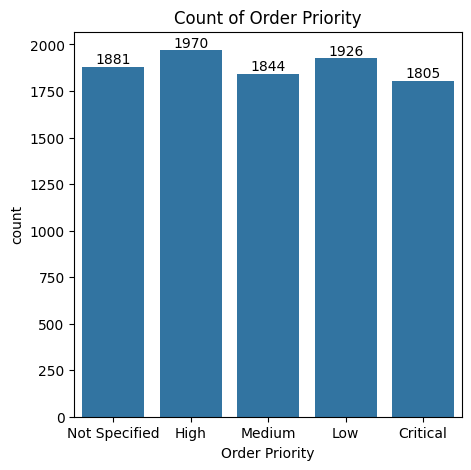

In [41]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Order Priority",data = df)
ax.bar_label(ax.containers[0])
ax

plt.title("Count of Order Priority")
plt.show()

In [44]:
x = df["Ship Mode"].value_counts().index
y = df["Ship Mode"].value_counts().values

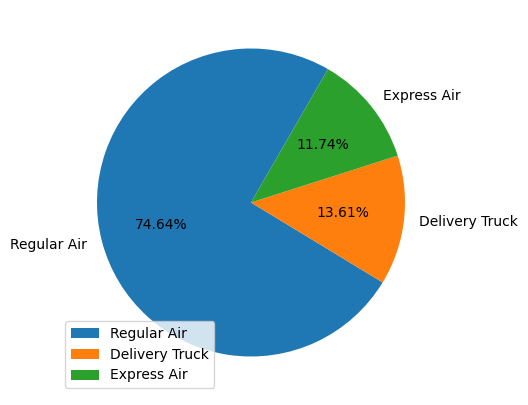

In [56]:
plt.figure(figsize = (5,5))
plt.pie(y,labels = x,startangle = 60,autopct = "%0.2f%%")
plt.legend(loc = 3)
plt.show()

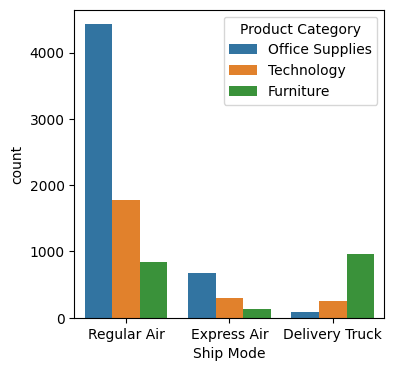

In [57]:
plt.figure(figsize = (4,4))
sns.countplot(x = "Ship Mode",data = df, hue = "Product Category")
plt.show()

In [58]:
# customer segment

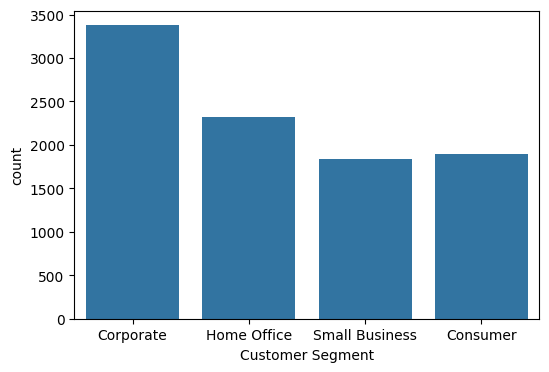

In [61]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Customer Segment",data = df)
plt.show()

# Product Category

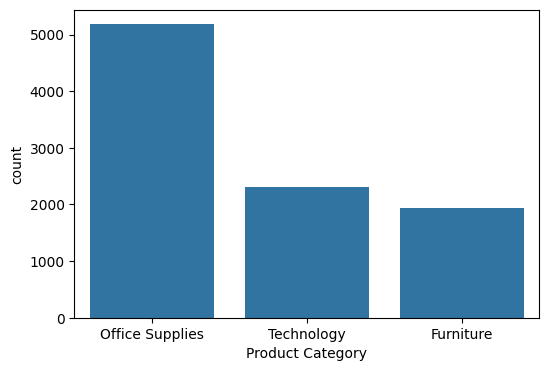

In [62]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Product Category",data = df)
plt.show()

# Product Sub-Category

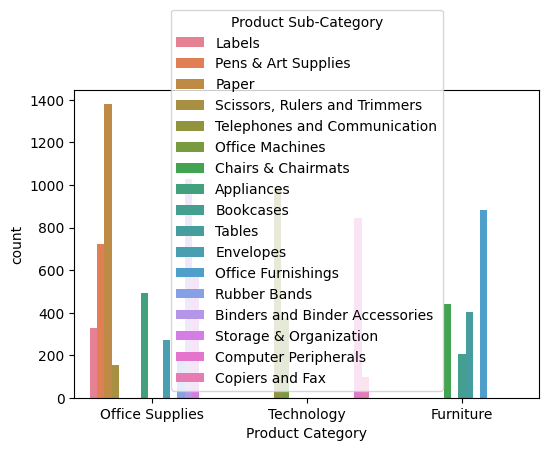

In [67]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Product Category",data = df,hue = "Product Sub-Category")
plt.show()

In [68]:
# finding data diffently for office supplies mtechnology and furniture

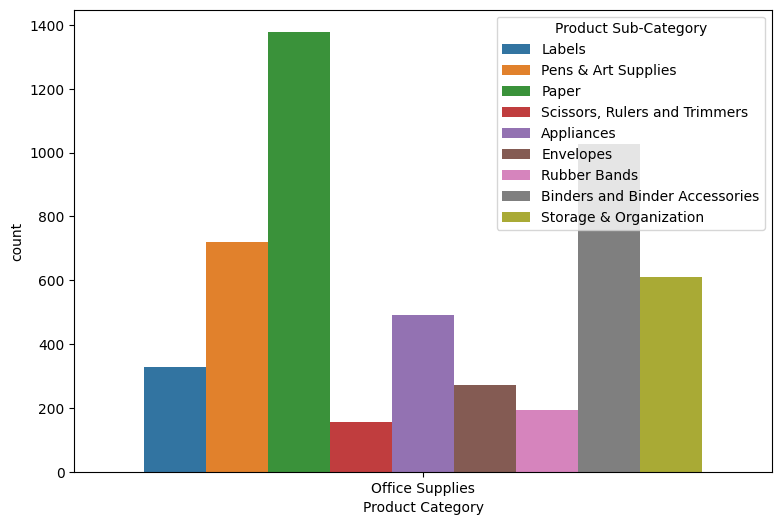

In [72]:
plt.figure(figsize = (9,6))
sns.countplot(x = "Product Category",data = df[df["Product Category"]=="Office Supplies"],hue = "Product Sub-Category")
plt.show()

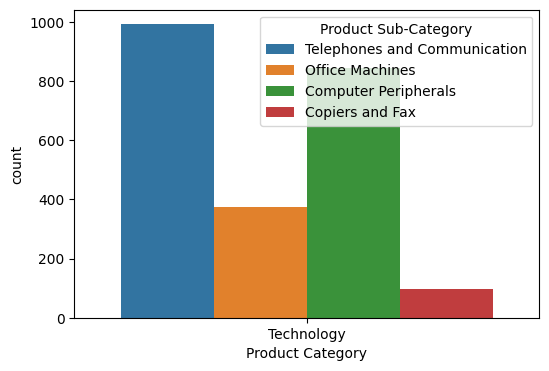

In [70]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Product Category",data = df[df["Product Category"]=="Technology"],hue = "Product Sub-Category")
plt.show()

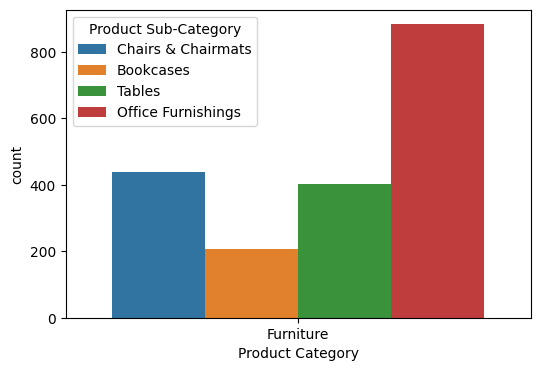

In [71]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Product Category",data = df[df["Product Category"]=="Furniture"],hue = "Product Sub-Category")
plt.show()

# order date

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                9426 non-null   int64  
 1   Order Priority        9426 non-null   object 
 2   Discount              9426 non-null   float64
 3   Unit Price            9426 non-null   float64
 4   Shipping Cost         9426 non-null   float64
 5   Customer ID           9426 non-null   int64  
 6   Customer Name         9426 non-null   object 
 7   Ship Mode             9426 non-null   object 
 8   Customer Segment      9426 non-null   object 
 9   Product Category      9426 non-null   object 
 10  Product Sub-Category  9426 non-null   object 
 11  Product Container     9426 non-null   object 
 12  Product Name          9426 non-null   object 
 13  Product Base Margin   9426 non-null   float64
 14  Region                9426 non-null   object 
 15  State or Province    

In [87]:
# changing data types for order date and ship date

In [103]:
df["Order Date"] = df["Order Date"].astype("datetime64[ns]")

In [85]:
df["Ship Date"] = df["Ship Date"].astype("datetime64[ns]")

In [86]:
df.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

In [88]:
# now separating years

In [112]:
df["Order Year"] = df["Order Date"].dt.year

In [113]:
# now we have a new coloumn named Order year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [108]:
df["Order Date"].dt.year.value_counts()

Order Date
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

In [115]:
df["Order Year"].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

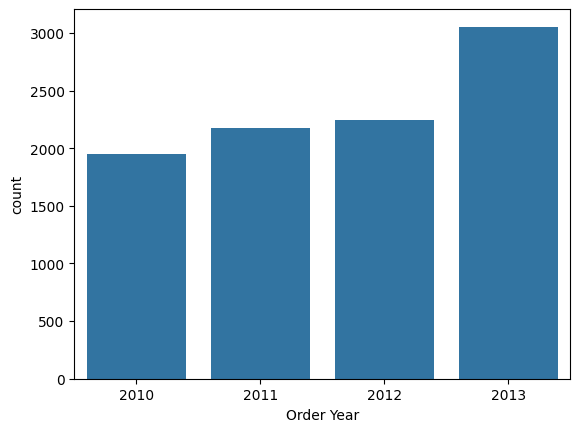

In [117]:
sns.countplot(x = "Order Year",data = df)
plt.show()

In [118]:
# which category have how much profit

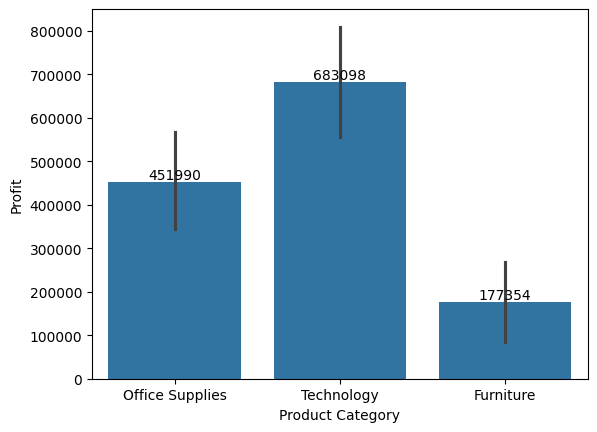

In [121]:
ax = sns.barplot(x = "Product Category",y = "Profit",data = df,estimator="sum")
ax.bar_label(ax.containers[0])
plt.show()

In [124]:
df["State or Province"].value_counts()

State or Province
California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
Colorado                 177
New Jersey               177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico               

In [125]:
# to fing only top  5 states which earns most profit

In [126]:
df["State or Province"].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

# Product Base Margin

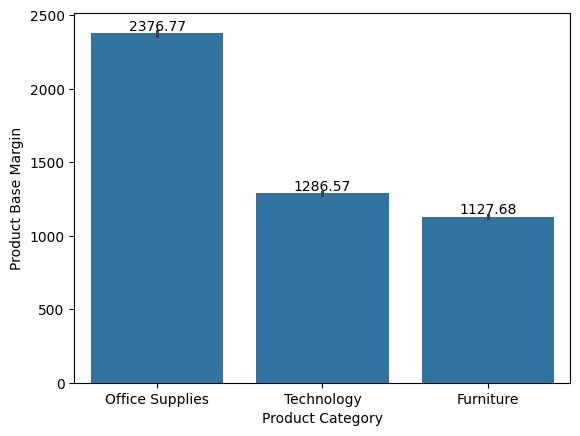

In [129]:
ax = sns.barplot(x = "Product Category",y = "Product Base Margin",data = df,estimator="sum")
ax.bar_label(ax.containers[0])
plt.show()

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("student_math_clean.csv")
df.head(2)

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6


In [6]:
print(df.head())

   student_id school sex  age address_type              family_size  \
0           1     GP   F   18        Urban           Greater than 3   
1           2     GP   F   17        Urban           Greater than 3   
2           3     GP   F   15        Urban  Less than or equal to 3   
3           4     GP   F   15        Urban           Greater than 3   
4           5     GP   F   16        Urban           Greater than 3   

     parent_status               mother_education  \
0            Apart               higher education   
1  Living together  primary education (4th grade)   
2  Living together  primary education (4th grade)   
3  Living together               higher education   
4  Living together            secondary education   

                father_education mother_job  ... family_relationship  \
0               higher education    at_home  ...                   4   
1  primary education (4th grade)    at_home  ...                   5   
2  primary education (4th grade)    at

In [7]:
df.describe()

,student_id,age,class_failures,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,99.500000,16.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,198.000000,17.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,296.500000,18.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,395.000000,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   student_id             395 non-null    int64 
 1   school                 395 non-null    object
 2   sex                    395 non-null    object
 3   age                    395 non-null    int64 
 4   address_type           395 non-null    object
 5   family_size            395 non-null    object
 6   parent_status          395 non-null    object
 7   mother_education       395 non-null    object
 8   father_education       395 non-null    object
 9   mother_job             395 non-null    object
 10  father_job             395 non-null    object
 11  school_choice_reason   395 non-null    object
 12  guardian               395 non-null    object
 13  travel_time            395 non-null    object
 14  study_time             395 non-null    object
 15  class_failures         

In [11]:
df["free_time"] = df["free_time"].astype("datetime64[ns]")
df["social"] = df["social"].astype("datetime64[ns]")
df["weekday_alcohol"] = df["weekday_alcohol"].astype("datetime64[ns]")
df["weekend_alcohol"] = df["weekend_alcohol"].astype("datetime64[ns]")
df["health"] = df["health"].astype("datetime64[ns]")
df["family_relationship"] = df["family_relationship"].astype("datetime64[ns]")

In [12]:
df.isnull().sum()

student_id               0
school                   0
sex                      0
age                      0
address_type             0
family_size              0
parent_status            0
mother_education         0
father_education         0
mother_job               0
father_job               0
school_choice_reason     0
guardian                 0
travel_time              0
study_time               0
class_failures           0
school_support           0
family_support           0
extra_paid_classes       0
activities               0
nursery_school           0
higher_ed                0
internet_access          0
romantic_relationship    0
family_relationship      0
free_time                0
social                   0
weekday_alcohol          0
weekend_alcohol          0
health                   0
absences                 0
grade_1                  0
grade_2                  0
final_grade              0
dtype: int64

# gender distribution

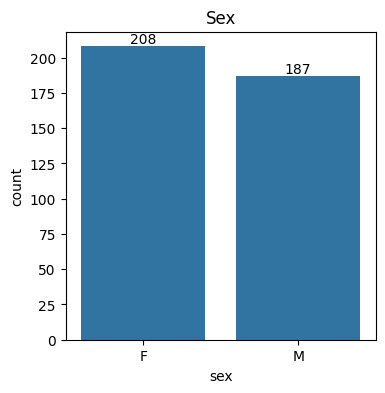

In [19]:
plt.figure(figsize = (4,4))
ax = sns.countplot(data = df,x = "sex")
ax.bar_label(ax.containers[0])
plt.title("Sex")
plt.show()

# from above chart we can say that the number of girls is higher than the no of boys

In [21]:
#No. of students in each school


df["school"].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

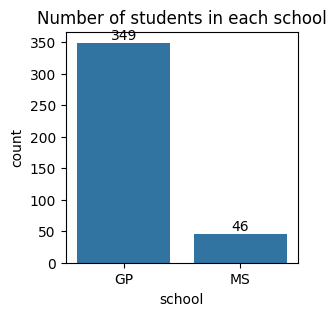

In [24]:
plt.figure(figsize = (3,3))
ax = sns.countplot(data = df,x = "school")
ax.bar_label(ax.containers[0])
plt.title("Number of students in each school")
plt.show()

# from above chart it is clear that GP school is almost 7 times greater than MS school 

# distribution on address type

In [27]:
df["address_type"].value_counts()

address_type
Urban    307
Rural     88
Name: count, dtype: int64

# score distribution according to sex

In [35]:
gb = df.groupby("sex").aggregate({"grade_1":"mean","grade_2":"mean","final_grade":"mean"})
gb

,grade_1,grade_2,final_grade
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


In [32]:
# from above table we found that there is a small differece in boys ands girls grades for both porteguese and english classes

# finding distribution of grades according to parents education

In [48]:
med = df.groupby("mother_education").aggregate({"grade_1":"mean","grade_2":"mean","final_grade":"mean"})


In [47]:
fed = df.groupby("father_education").aggregate({"grade_1":"mean","grade_2":"mean","final_grade":"mean"})

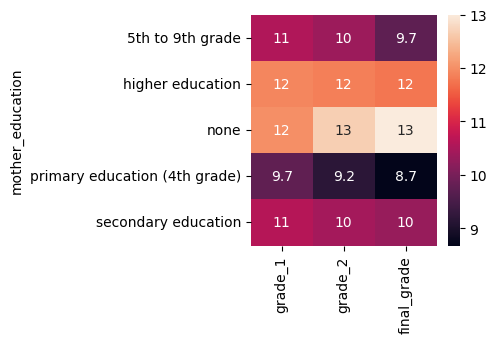

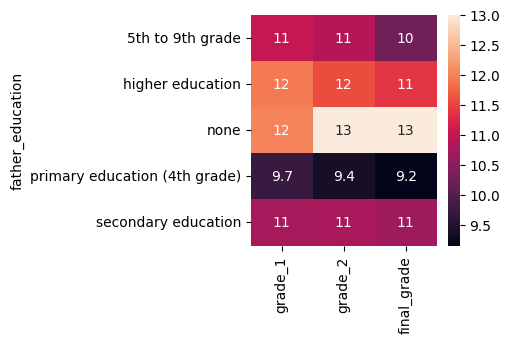

In [51]:
plt.figure(figsize = (3,3))
sns.heatmap(med,annot = True)
plt.show()

plt.figure(figsize = (3,3))
sns.heatmap(fed,annot = True)
plt.show()

# distribution of grades on parent_status

In [54]:
p_stat = df.groupby("parent_status").aggregate({"grade_1":"mean","grade_2":"mean","final_grade":"mean"})

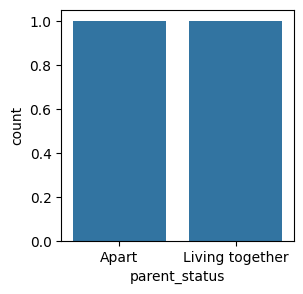

In [60]:
plt.figure(figsize = (3,3))
sns.countplot(data = p_stat,x = "parent_status")
plt.show()

In [58]:
# from above chart it is confirmed that parent_status have no impact on grades

# effect of internet access on grades

In [72]:
ia = df.groupby("internet_access").aggregate({"grade_1":"mean","grade_2":"mean","final_grade":"mean"})
ia

,grade_1,grade_2,final_grade
internet_access,,,
no,10.378788,9.712121,9.409091
yes,11.015198,10.914894,10.617021


In [73]:
# from above table we found that students with internet access are intelligent than others

# finding the impact of extra classes

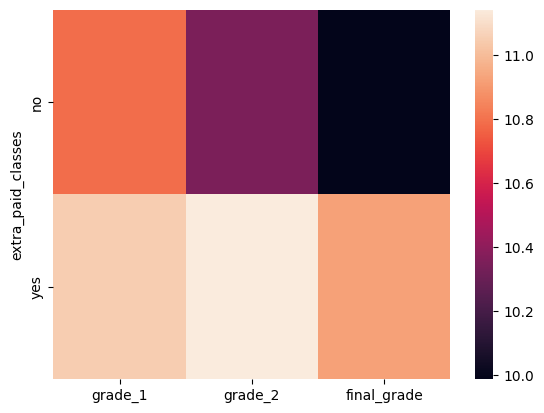

In [78]:
ec = df.groupby("extra_paid_classes").aggregate({"grade_1":"mean","grade_2":"mean","final_grade":"mean"})
sns.heatmap(ec)
plt.show()

In [79]:
# from above chart it is clear that extra classes have small impact on grades

In [81]:
ec = df.groupby("romantic_relationship").aggregate({"grade_1":"mean","grade_2":"mean","final_grade":"mean"})
ec

,grade_1,grade_2,final_grade
romantic_relationship,,,
no,10.996198,11.011407,10.836502
yes,10.734848,10.121212,9.575758
